s1301a - 10:03 min file

s02-1 - 22 sec file

Window size is the amount of time over which a waveform is sampled, known as time record, expressed in samples. For example, a window size of 128 samples at a sample rate of 48 kHz. Equals a time record of 128 samples x 1/48000 seconds = 0.0027 seconds or 2.7 milliseconds.

Window length is the length of the fixed intervals in which STFT divides the signal. Hop length is the length of the non-intersecting portion of window length. Overlap length is the length of the intersecting portion of the window length.

In [44]:
10*60+3, 603*16000

(603, 9648000)

In [45]:
22, 22*16000

(22, 352000)

In [40]:
# !pip install librosa

In [41]:
import soundfile as sf
import os
import pyfoal
import pypar
import librosa
import torchaudio
from scipy.io import wavfile


In [42]:
# filename = './s1301a.wav'
filename = './s02-1.wav'

### Soundfile

In [47]:
data, sr = sf.read(filename)


In [65]:
data

array([3.05175781e-04, 2.44140625e-04, 9.15527344e-05, ...,
       5.49316406e-04, 4.88281250e-04, 3.96728516e-04])

In [57]:
data.shape, sr

((348026,), 16000)

### Size

In [50]:
os.path.getsize(filename) // 2

348048

### Librosa

In [53]:
data_librosa, sr = librosa.load(filename, sr=16000)

In [54]:
data_librosa.shape

(348026,)

In [64]:
data_librosa

array([3.0517578e-04, 2.4414062e-04, 9.1552734e-05, ..., 5.4931641e-04,
       4.8828125e-04, 3.9672852e-04], dtype=float32)

In [55]:
librosa.get_duration(data_librosa)

/home/pranav/conda/envs/prominence-est-conda-py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[3.0517578e-04 2.4414062e-04 9.1552734e-05 ... 5.4931641e-04 4.8828125e-04
 3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


15.783492063492064

### Torchaudio

In [58]:
data_torch, sr = torchaudio.load(filename)

In [63]:
data_torch

tensor([[3.0518e-04, 2.4414e-04, 9.1553e-05,  ..., 5.4932e-04, 4.8828e-04,
         3.9673e-04]])

In [59]:
data_torch.shape

torch.Size([1, 348026])

### Scipy wavefile

In [60]:
sr, data_scipy = wavfile.read(filename)

In [61]:
data_scipy, data_scipy.shape

(array([10,  8,  3, ..., 18, 16, 13], dtype=int16), (348026,))

In [62]:
window_length_ms = 10

window_length = int((window_length_ms/1000)*sr)
print('Window length in samples ' + str(window_length))


Window length in samples 160


### Audio load

In [9]:
import emphases

In [10]:
audio = emphases.load.audio('../data/cache/Buckeye/wavs/s02-1.wav')

In [13]:
audio.shape, audio.shape[-1] // emphases.HOPSIZE

(torch.Size([1, 348026]), 2175)

### Mel Exp

In [57]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt


In [58]:
def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


In [59]:
import emphases
import torch

### Custom Mel

In [60]:
mel_loader = emphases.load.MelSpectrogram()


/home/pranav/prominence-estimation-exp/emphases/emphases/load.py:56: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=80 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  emphases.NUM_MELS


In [61]:
audio = emphases.load.audio('../data/cache/Buckeye/wavs/s03-1.wav')
audio2 = emphases.load.audio('../data/cache/Buckeye/wavs/s11-1.wav')

In [62]:
mel_spectrogram1 = mel_loader.forward(audio)
mel_spectrogram1.shape

torch.Size([1, 80, 1352])

In [84]:
audio.shape[-1]//160

2163

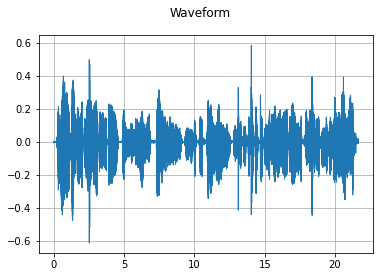

In [63]:
plot_waveform(audio, 16000)

### Torch Mel

In [72]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T


In [73]:
n_fft = 1024
win_length = None
hop_length = 512

# Define transform
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)


In [85]:
spec = spectrogram(audio2)

In [97]:
audio2.shape

torch.Size([1, 384520])

In [89]:
audio2.shape[-1]/752

511.32978723404256

In [88]:
spec.shape

torch.Size([1, 513, 752])

In [101]:
n_fft = 1024
win_length = None
hop_length = 160
n_mels = 80

mel_spectrogram = T.MelSpectrogram(
    sample_rate=16000,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

In [102]:
melspec = mel_spectrogram(audio2)

In [103]:
melspec.shape

torch.Size([1, 80, 2404])

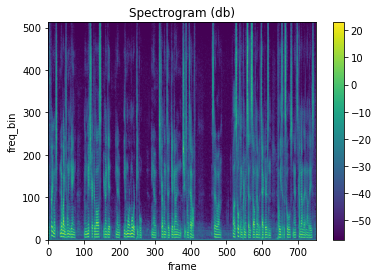

In [104]:
plot_spectrogram(spec[0], title=None, ylabel="freq_bin")

In [49]:
audio.shape[-1]/(1352*1024)

0.25008017635909763

In [39]:
audio.shape

torch.Size([1, 346223])

In [34]:
audio[:, :494].shape

torch.Size([1, 494])

In [53]:
mel_spectrogram2 = mel_loader.forward(audio2)
mel_spectrogram2.shape

torch.Size([1, 80, 1502])

In [54]:
mel_spectrogram1.shape[-1]

1352

In [55]:
mel_spectrogram = [mel_spectrogram1, mel_spectrogram2]

In [56]:
mel_lengths = torch.tensor(
    [mel.shape[-1] for mel in mel_spectrogram], 
    dtype=torch.long)

max_mel_lengths = mel_lengths.max()

In [57]:
mel_lengths.max().item()

1502

### Checks

In [1]:
import emphases
import pypar
import os
import torch
import functools
import numpy as np
import seaborn as sns
import tqdm

In [14]:
train_loader, valid_loader = emphases.data.loaders('Buckeye', 'train', 'valid', gpu=None)

In [15]:
# audio, mel_spectrogram, prominence, word_bounds = train_loader.dataset.__getitem__(0)
# train_loader.dataset.lengths
# audio.shape[-1], audio.shape[-1]//emphases.HOPSIZE

In [16]:
# np.histogram(train_loader.dataset.spectrogram_lengths)

In [17]:
# train_loader.dataset.lengths, train_loader.dataset.spectrogram_lengths
# sns.histplot(train_loader.dataset.spectrogram_lengths)

In [18]:
train_loader.batch_sampler.set_epoch(0// len(train_loader.dataset))

In [19]:
all_batches = []
for batch in train_loader:
    all_batches.append(batch)

64it [00:00, 311.03it/s]


In [20]:
batch[0].shape

torch.Size([64, 1, 228320])

In [21]:
batch[1][11]

tensor([[1.1056e-03, 6.3663e-04, 8.9659e-05,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1177e-03, 6.9092e-04, 1.2387e-04,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0182e-03, 6.0388e-04, 8.7518e-05,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [3.0827e-08, 3.6659e-08, 4.5093e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.9969e-08, 3.4506e-08, 4.7271e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.5464e-08, 2.4083e-08, 2.0766e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [22]:
batch[1].shape

torch.Size([64, 80, 1428])

In [23]:
batch[2][0], batch[2].shape

(tensor([[0.5938, 0.0000, 0.1875, 0.0625, 0.0312, 0.5625, 0.0000, 0.0000, 0.0312,
          0.0625, 0.0000, 0.0000, 0.0000, 0.5312, 0.0312, 0.0312, 0.1875, 0.0000,
          0.0312, 0.2812, 0.0000, 0.2500, 0.0000, 0.0000, 0.0312, 0.0312, 0.5938,
          0.4375, 0.0000, 0.0938, 0.0000, 0.0000, 0.0938, 0.0000, 0.1562, 0.1250,
          0.0312, 0.3750, 0.0000, 0.0625, 0.6562, 0.0000, 0.2500, 0.5938, 0.0000,
          0.2812, 0.0312, 0.3438, 0.6875]]),
 torch.Size([64, 1, 49]))

In [24]:
len(batch[3])

64

In [25]:
torch.is_tensor(batch[3])

False

In [26]:
s = (item.to('cpu') if torch.is_tensor(item) else item for item in batch)

In [27]:
(padded_audio,
padded_mel_spectrogram,
padded_prominence,
word_bounds,
word_lengths,
frame_lengths) = s

In [28]:
padded_audio.shape

torch.Size([64, 1, 228320])

In [29]:
padded_mel_spectrogram.shape

torch.Size([64, 80, 1428])

In [30]:
padded_mel_spectrogram[0].shape

torch.Size([80, 1428])

In [31]:
len(word_bounds[0])

49

In [32]:
padded_prominence[0].shape

torch.Size([1, 49])

In [33]:
model = emphases.model.BaselineModel()

In [34]:
# model_input = (padded_mel_spectrogram)
model_input = (padded_audio[0:4], word_bounds[0:4], padded_prominence[0:4])

In [35]:
output = model(model_input)

RuntimeError: Given groups=1, weight of size [128, 80, 5], expected input[4, 1, 228320] to have 80 channels, but got 1 channels instead

In [27]:
output.is_cuda

False

In [64]:
# output_reshaped = output.reshape(64, 1, -1)
# output_reshaped

output.squeeze().shape

torch.Size([64, 56])

In [67]:
padded_prominence.reshape(64, -1, 1).squeeze(-1).shape

torch.Size([64, 56])

In [78]:
# loss_fn = torch.nn.MSELoss()
loss_fn = torch.nn.SmoothL1Loss()


In [79]:
loss_fn(output_reshaped, padded_prominence)

tensor(0.0354, grad_fn=<SmoothL1LossBackward0>)

### Slice the inputs wrt word bounds

Process the word bounds, split the torch tensor into chunks and then pass further into the network, grad true

In [36]:
word_lengths

tensor([49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45,
        49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45,
        49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45, 49, 33, 45,
        49, 33, 45, 49, 33, 45, 49, 33, 45, 49])

In [37]:
padded_prominence[0]

tensor([[0.5938, 0.0000, 0.1875, 0.0625, 0.0312, 0.5625, 0.0000, 0.0000, 0.0312,
         0.0625, 0.0000, 0.0000, 0.0000, 0.5312, 0.0312, 0.0312, 0.1875, 0.0000,
         0.0312, 0.2812, 0.0000, 0.2500, 0.0000, 0.0000, 0.0312, 0.0312, 0.5938,
         0.4375, 0.0000, 0.0938, 0.0000, 0.0000, 0.0938, 0.0000, 0.1562, 0.1250,
         0.0312, 0.3750, 0.0000, 0.0625, 0.6562, 0.0000, 0.2500, 0.5938, 0.0000,
         0.2812, 0.0312, 0.3438, 0.6875]])

In [38]:
# word_bounds[0][1][0]*emphases.HOPSIZE, word_bounds[0][1][1]*emphases.HOPSIZE

In [39]:
(1376-1424)*emphases.HOPSIZE

-7680

In [37]:
input_features = padded_audio[1, :, :][0]
wb = word_bounds[1]

In [38]:
def get_slices(input_features, wb):
    """
    Generate framewise slices as per word bounds
    return a padded tensor for given input_features

    """
    duration_slices = []
    for bound in wb:
        dur = (bound[1] - bound[0])*emphases.HOPSIZE
        duration_slices.append(dur)
    
    extra_noise = False
    
    if sum(duration_slices)!=input_features.shape[-1]:
        extra_noise = True
        duration_slices.append(input_features.shape[-1] - sum(duration_slices))

    slices = torch.split(input_features, duration_slices)

    if extra_noise:
        # get rid of the extra noise duration
        duration_slices = duration_slices[:-1]
        slices = slices[:-1]

    padded_features = torch.zeros(
            (1, len(duration_slices), max(duration_slices)))

    for idx, sl in enumerate(slices):
        padded_features[:, idx, :len(sl)] = sl

    feat_len = padded_features.shape[-1]

    return padded_features, feat_len


In [42]:
# f1, f1_len = get_slices(padded_audio[0, :, :][0], word_bounds[0])
# f2, f2_len = get_slices(padded_audio[1, :, :][0], word_bounds[1])

# f1.shape
# f2.shape

# f_lens = [f1_len, f2_len]
# f = [f1, f2]

# max_flen = max(f_lens)

# padded_features_2 = torch.zeros((batch_size, padded_prominence.shape[-1], max_flen))

# for idx, (f_len, f_item) in enumerate(zip(f_lens, f)):
#     padded_features_2[idx, :f_item.shape[1], :f_item.shape[-1]] = f_item[:]


In [58]:
padded_audio.shape

torch.Size([64, 1, 292640])

In [40]:
padded_audio[0, :, :][0].shape, input_features.reshape(-1).shape

(torch.Size([292640]), torch.Size([292640]))

In [41]:
feat_lens = []
feats = []
for idx, (input_features, wb) in enumerate(zip(padded_audio, word_bounds)):
    feat, feat_length = get_slices(input_features.reshape(-1), wb)
    feats.append(feat)
    feat_lens.append(feat_length)

In [48]:
max_flen = max(feat_lens)

padded_features_2 = torch.zeros((emphases.BATCH_SIZE, padded_prominence.shape[-1], max_flen))

for idx, (f_len, f_item) in enumerate(zip(feat_lens, feats)):
    padded_features_2[idx, :f_item.shape[1], :f_item.shape[-1]] = f_item[:]


In [73]:
padded_features_2.shape[1]

56

In [65]:
padded_prominence.shape

torch.Size([64, 1, 56])

In [66]:
padded_audio.shape

torch.Size([64, 1, 292640])

In [67]:
padded_features_2.shape

torch.Size([64, 56, 15840])

### Model forward pass